## Heart Disease Prediction Using Machine Learning

In [120]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline


### Data Description
The original data had 76 variables and the dataset used has only 14. The columns names were renamed for easy understanding.Variables like chest pain , blood pressure, cholesterol etc. were used for determining the whether a person suffer from heart disease or not.

In [121]:
heart = pd.read_csv("heart.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Load Data

In [122]:
heart.columns = ['age', 'sex', 'c_pain', 'blood_pressure', 'cholesterol', 'blood_sugar', 'ecg', 'max_heart_rate',
       'induced_angina', 'depression', 'slope', 'major_vessels', 'thal', 'diagnosis']

heart.columns
heart.to_csv('heart_modified.csv')

In [123]:
heart.head()

,age,sex,c_pain,blood_pressure,cholesterol,blood_sugar,ecg,max_heart_rate,induced_angina,depression,slope,major_vessels,thal,diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Explore and Analyse data

In [124]:
minAge=min(heart.age)
maxAge=max(heart.age)
meanAge=heart.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [125]:
heart.age.value_counts()[:10]
#data age show value counts for age least 10

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

In [126]:
print ("Count each sex per heart disease type")
heart.groupby(["diagnosis", "sex"])["age"].count()

Count each sex per heart disease type


diagnosis  sex
0          0       24
           1      114
1          0       72
           1       93
Name: age, dtype: int64

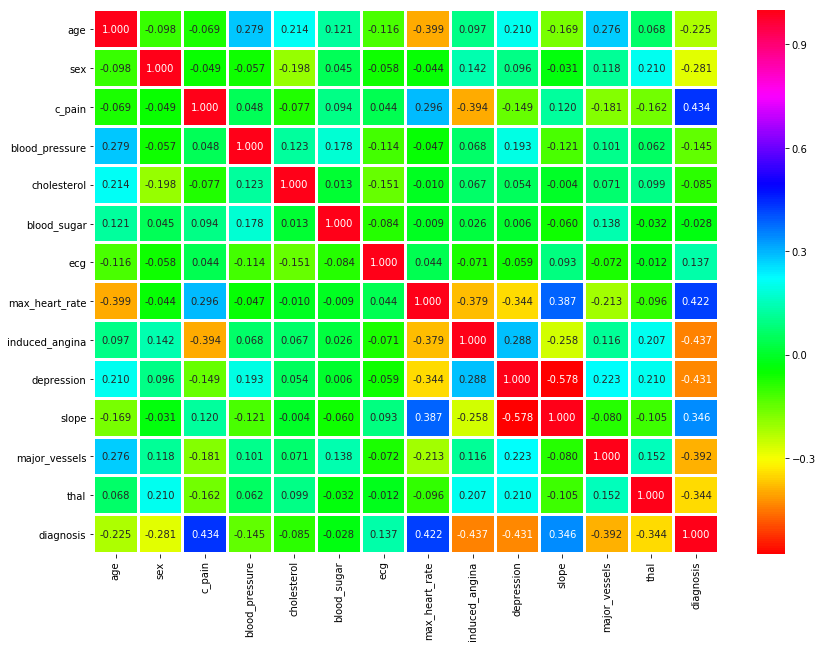

In [127]:
#Heat map
plt.figure(figsize=(14,10))
sns.heatmap(heart.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [128]:
heart.groupby('c_pain',as_index=False)['diagnosis'].mean()

,c_pain,diagnosis
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [129]:
heart.groupby('slope',as_index=False)['diagnosis'].mean()

,slope,diagnosis
0,0,0.428571
1,1,0.350000
2,2,0.753521


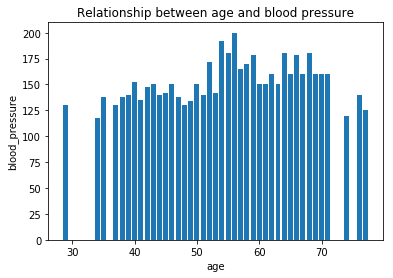

In [130]:
plt.xlabel("age")
plt.ylabel("blood_pressure")

# define title
plt.title("Relationship between age and blood pressure")

# plot
plt.bar(heart['age'], heart['blood_pressure'])
plt.show()

### Data Preparation

In [131]:
# checking columns for missing values, none found
heart.isnull().sum()

age               0
sex               0
c_pain            0
blood_pressure    0
cholesterol       0
blood_sugar       0
ecg               0
max_heart_rate    0
induced_angina    0
depression        0
slope             0
major_vessels     0
thal              0
diagnosis         0
dtype: int64

With clean and renamed data, the data will be split into a 30:70 train and test sets.

In [132]:
# Getting the target variable
X, y = heart.iloc[:, :-1], heart.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [133]:
#splitting the data for analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2202)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


Before using the data for machine learning, it needs to be normalized to scale the data.

In [134]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Prediction and modelling with application of Machine Learning


In [135]:
# creating a keyword dictionary/ keyword argument
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
   
    # initiating model
    model = classifier(**kwargs)
    
    # training model
    model.fit(X_train,y_train)
    
    # checking accuracy and printing results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    #ypred_from_tree = model.predict(X_test)
    
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
   
    
    return model

### K-Nearest Neighbours (KNN)

In [136]:
# KNN
model = train_model(X_train, y_train.ravel(), X_test, y_test, KNeighborsClassifier)

Train accuracy: 84.43%
Test accuracy: 81.32%


In [137]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train.ravel(), X_test, y_test, KNeighborsClassifier, n_neighbors= i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 75.82%
n_neigbors = 2
Train accuracy: 89.15%
Test accuracy: 72.53%
n_neigbors = 3
Train accuracy: 86.79%
Test accuracy: 82.42%
n_neigbors = 4
Train accuracy: 83.96%
Test accuracy: 80.22%
n_neigbors = 5
Train accuracy: 84.43%
Test accuracy: 81.32%
n_neigbors = 6
Train accuracy: 85.38%
Test accuracy: 84.62%
n_neigbors = 7
Train accuracy: 83.02%
Test accuracy: 83.52%
n_neigbors = 8
Train accuracy: 83.02%
Test accuracy: 82.42%
n_neigbors = 9
Train accuracy: 84.43%
Test accuracy: 86.81%


### Random Forest classifier



Train accuracy: 98.58%
Test accuracy: 79.12%


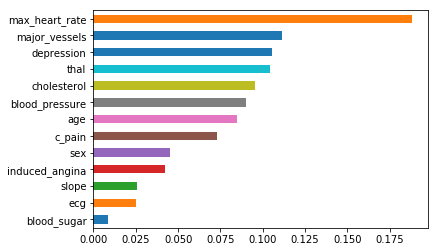

In [138]:
# Random Forest classifier
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=42)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [139]:
# tuned Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=2202)

Train accuracy: 100.00%
Test accuracy: 83.52%


### Decision Tree


Train accuracy: 100.00%
Test accuracy: 79.12%


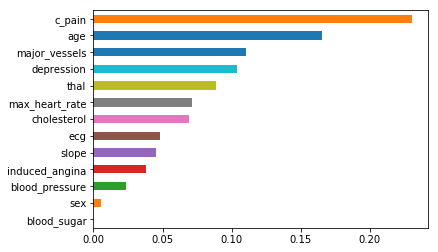

In [140]:
# Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=2202)

# plot feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()


In [141]:
# Check optimal 'max_depth' parameter
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2202)

max_depth = 1
Train accuracy: 74.06%
Test accuracy: 80.22%
max_depth = 2
Train accuracy: 75.00%
Test accuracy: 81.32%
max_depth = 3
Train accuracy: 84.43%
Test accuracy: 83.52%
max_depth = 4
Train accuracy: 88.21%
Test accuracy: 79.12%
max_depth = 5
Train accuracy: 92.92%
Test accuracy: 74.73%
max_depth = 6
Train accuracy: 97.17%
Test accuracy: 75.82%
max_depth = 7
Train accuracy: 99.06%
Test accuracy: 76.92%


Using feature importances graph could be plotted with random forest classifier and decision trees but with missing decision function attribute the average precision recall could not be determined.

### Logistic Regression

In [142]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)


Train accuracy: 83.96%
Test accuracy: 85.71%


### Average Precision-recall score

In [143]:
#Logistic Regression
y_score = model.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format( average_precision))

Average precision-recall score: 0.94


### Support Vector Machines

In [144]:
# Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)


Train accuracy: 91.51%
Test accuracy: 85.71%


In [145]:
# tuned SVM
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.05, kernel='linear')

Train accuracy: 83.02%
Test accuracy: 85.71%


In [146]:
y_score = model.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.95


### Gaussian Naive Bayes

In [147]:
#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)


Train accuracy: 83.49%
Test accuracy: 83.52%


In [148]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.95


### Results
After comparing the different machine learning algorithms and predict if a person has heart disease or not, the final results are below

In [149]:
# Creat an empty list
accuracy = []
#precision = []

# Classifiers
classifiers = ['Naive Bayes','Logistic Regression','Random Forests',  'SVM','KNN', 'Decision Trees']

# list of classifiers with parameters
models = [RandomForestClassifier(n_estimators=110, random_state=2600),KNeighborsClassifier(n_neighbors=5), GaussianNB(),LogisticRegression(), 
         SVC(C=0.05, kernel='linear'),DecisionTreeClassifier(max_depth=6, random_state=2600) ]


# append to list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)
    #precision.append(average_precision)

In [150]:
# Accuracy dataframe
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)     
sort_by_accuracy = summary.sort_values('accuracy',ascending=False)
sort_by_accuracy

,accuracy
SVM,0.857143
KNN,0.857143
Random Forests,0.835165
Naive Bayes,0.813187
Logistic Regression,0.813187
Decision Trees,0.769231


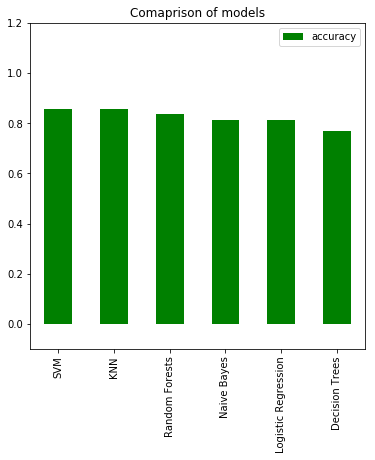

In [151]:
fig =sort_by_accuracy.plot(kind='bar',title='Comaprison of models',color='g',figsize =(6,6),ylim=[-0.1,1.2]).get_figure()
fig.savefig('image.png')

### linear Regression

In [152]:
# linear regression 
#X = heart["c_pain"].values.reshape(-1, 1)
#y = heart["cholesterol"].values.reshape(-1, 1)

#print("Shape: ", X.shape, y.shape)

In [153]:
#plt.scatter(X, y)
#plt.xlabel("Chest Pain")
#plt.ylabel("Cholesterol")


In [154]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [155]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
score = linear_reg.score(X_test, y_test)
score


0.4945017725657175

In [157]:

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")



Mean Squared Error (MSE): 0.11964455087201954
R-squared (R2 ): 0.4945017725657175


In [158]:
model.score(X_test, y_test)

0.4945017725657175

In [159]:
# Drop diagnosis column 
heart.drop('diagnosis', axis=1, inplace=True)

In [160]:
heart.head()

,age,sex,c_pain,blood_pressure,cholesterol,blood_sugar,ecg,max_heart_rate,induced_angina,depression,slope,major_vessels,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [161]:
from sklearn.datasets import make_regression

n_features = 13
X, y = make_regression(n_samples=303, n_features=n_features, 
                       n_informative=n_features, random_state=2610, 
                       noise=0.5, bias=100.0)
print(X.shape)

(303, 13)


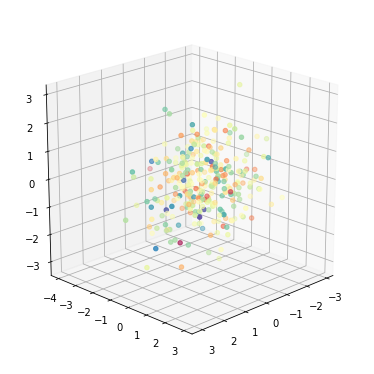

In [162]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()
# with 13 features the graph was as expected, would be better with about 3 features

In [163]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all 13 of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9999936862676593


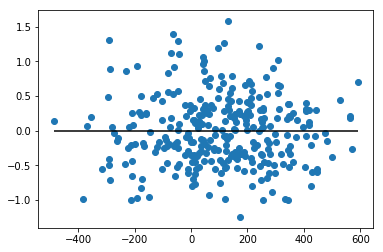

In [164]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

## Conclusion
The simple methods generated decent results and were useful but the complex algorithms like SVM and KNN produced better results than the simple ones. Machine learning could prove to be very useful in predicting diseases with basic information in the absence of a medical professional.